# HW 3 Assignment 2
Nurvirta Monarizqa (nm2773)

## Ideas:
### How does age group impact trip distance? Are the millennials tend to take longer rides than the others?

## Definitions:
- Total riders: working population, not typically retired, born on or after 1951, denoted as $T$
- Millennials: riders who were born in or after 1980, denoted as $y$
- Others: Total riders - Millennials, denoted as $x$
- Distance: distance from start to end station (geo distance)
- Long distance trips: number of trips with distance greater than the average of the total riders distance, denoted as $L$
- Short distance trips: number of trips with distance less than or equal the average of the total ridets distance, denoted as $S$

## Null Hypothesis:
$H_0$: The ratio of long distance trips by young riders to all distance trips by young riders is less than or equal to the ratio of long distance trips by the rest of the population to all distance trips by the rest of the population.

$$\frac{Ly}{Sy} \leq \frac{Lx}{Sx}$$

## Alternative Hypothesis:
$H_1$: The ratio of long distance trips by young riders to all distance trips by young riders is greater than the ratio of long distance trips by the rest of the population to all distance trips by the rest of the population.

$$\frac{Ly}{Sy} > \frac{Lx}{Sx}$$

## Data Observation:

### First, pull the data

In [1]:
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
import pandas as pd

#opening file into this notebook
r = urllib2.urlopen('https://s3.amazonaws.com/tripdata/201606-citibike-tripdata.zip').read()
z = ZipFile(StringIO(r))
citibikedata = z.open('201606-citibike-tripdata.csv')
data = pd.read_csv(citibikedata)
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


### Then select  and create columns that we need
We only care with birth year and their trip distance,so we only need birth care, start and stop locations (latitude and longitude)

In [2]:
locdata = data.loc[:,["start station latitude",
                      "start station longitude",
                      "end station latitude", 
                      "end station longitude", 
                      "birth year"]]
locdata.head()

,start station latitude,start station longitude,end station latitude,end station longitude,birth year
0,40.734011,-74.002939,40.758985,-73.993800,1972.0
1,40.719009,-73.958525,40.721533,-73.957824,1967.0
2,40.764618,-73.987895,40.763441,-73.982681,1989.0
3,40.757148,-73.972078,40.720196,-73.989978,1991.0
4,40.729039,-73.994046,40.734546,-73.990741,1989.0


Merge the latitude and longitude into a single column so we will only have 2 columns for locations instead of 4

In [3]:
locdata.loc[:,"start_location"] = "(" + locdata["start station latitude"].map(str) + "," + " " + locdata["start station longitude"].map(str) + ")"
locdata.loc[:,"stop_location"] = "(" + locdata["end station latitude"].map(str) + "," + " " + locdata["end station longitude"].map(str) + ")"
locdata.loc[:,"start_location"] = locdata.loc[:,"start_location"].map(eval)
locdata.loc[:,"stop_location"] = locdata.loc[:,"stop_location"].map(eval)
locdata.head()

,start station latitude,start station longitude,end station latitude,end station longitude,birth year,start_location,stop_location
0,40.734011,-74.002939,40.758985,-73.993800,1972.0,"(40.73401143, -74.00293877)","(40.758984814, -73.9937996864)"
1,40.719009,-73.958525,40.721533,-73.957824,1967.0,"(40.7190095, -73.95852515)","(40.72153267, -73.95782357)"
2,40.764618,-73.987895,40.763441,-73.982681,1989.0,"(40.76461837, -73.98789473)","(40.76344058, -73.98268129)"
3,40.757148,-73.972078,40.720196,-73.989978,1991.0,"(40.75714758, -73.97207836)","(40.72019576, -73.98997825)"
4,40.729039,-73.994046,40.734546,-73.990741,1989.0,"(40.72903917, -73.99404649)","(40.73454567, -73.99074142)"


In [4]:
# drop unnecessary columns: the first 4 columns, because we already have start_location and stop_locationm
locdata = locdata.drop(list(locdata.iloc[:,0:4].columns),1)
locdata.head()

,birth year,start_location,stop_location
0,1972.0,"(40.73401143, -74.00293877)","(40.758984814, -73.9937996864)"
1,1967.0,"(40.7190095, -73.95852515)","(40.72153267, -73.95782357)"
2,1989.0,"(40.76461837, -73.98789473)","(40.76344058, -73.98268129)"
3,1991.0,"(40.75714758, -73.97207836)","(40.72019576, -73.98997825)"
4,1989.0,"(40.72903917, -73.99404649)","(40.73454567, -73.99074142)"


### Calculate the distance using geopy package.
This package is not included in anaconda, so better to download first

In [5]:
# add one more column: distance
# we use geopy package --> WARNING <-- IT IS NOT INCLUDED IN ANACONDA
# PLEASE INSTALL GEOPY FIRST

import geopy
from geopy.distance import vincenty

def dist_(df):
    return vincenty(df["start_location"],df["stop_location"]).miles

locdata["distance"] = locdata.apply(dist_, axis=1)

In [6]:
locdata.head()

,birth year,start_location,stop_location,distance
0,1972.0,"(40.73401143, -74.00293877)","(40.758984814, -73.9937996864)",1.788728
1,1967.0,"(40.7190095, -73.95852515)","(40.72153267, -73.95782357)",0.177958
2,1989.0,"(40.76461837, -73.98789473)","(40.76344058, -73.98268129)",0.285343
3,1991.0,"(40.75714758, -73.97207836)","(40.72019576, -73.98997825)",2.717342
4,1989.0,"(40.72903917, -73.99404649)","(40.73454567, -73.99074142)",0.417694


### Now, see the data description for $locdata$

In [7]:
locdata.distance.describe()

count    1.460318e+06
mean     1.176603e+00
std      1.000073e+01
min      0.000000e+00
25%      5.560368e-01
50%      9.175797e-01
75%      1.514974e+00
max      5.385870e+03
Name: distance, dtype: float64

Mean of the distance is 1.176 miles while the median is only 0.9175 miles. We will keep the mean as the threshold, stored in variable `avg_dis`

In [8]:
avg_dis = locdata.distance.mean()

### Separate the millenials from the rest to test hypothesis

In [9]:
millennials = locdata[locdata["birth year"] >= 1980]
millennials.head()

,birth year,start_location,stop_location,distance
2,1989.0,"(40.76461837, -73.98789473)","(40.76344058, -73.98268129)",0.285343
3,1991.0,"(40.75714758, -73.97207836)","(40.72019576, -73.98997825)",2.717342
4,1989.0,"(40.72903917, -73.99404649)","(40.73454567, -73.99074142)",0.417694
6,1986.0,"(40.75299641, -73.98721619)","(40.71494807, -74.00234482)",2.742892
7,1986.0,"(40.75019995, -73.99093085)","(40.73223272, -73.98889957)",1.244361


In [10]:
others = locdata[locdata["birth year"] >= 1951]
others = others[others["birth year"] < 1980]
others.head()

,birth year,start_location,stop_location,distance
0,1972.0,"(40.73401143, -74.00293877)","(40.758984814, -73.9937996864)",1.788728
1,1967.0,"(40.7190095, -73.95852515)","(40.72153267, -73.95782357)",0.177958
5,1974.0,"(40.73827428, -73.98751968)","(40.76269882, -73.99301222)",1.709827
8,1968.0,"(40.75594159, -74.0021163)","(40.70823502, -74.00530063)",3.296113
9,1971.0,"(40.716887, -73.963198)","(40.71247661, -73.94100005)",1.204558


### Plot the boxplots to get insights

Populating the interactive namespace from numpy and matplotlib


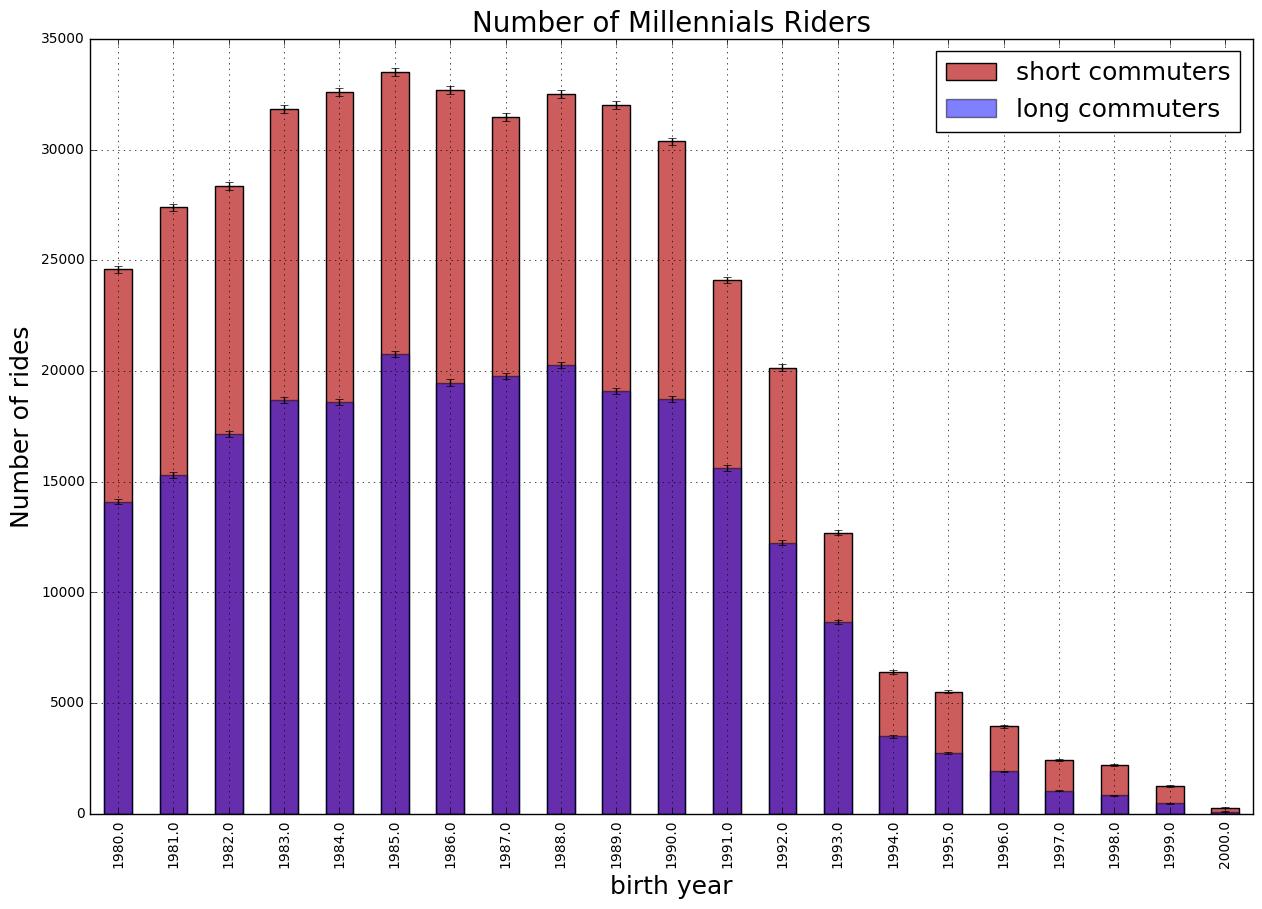

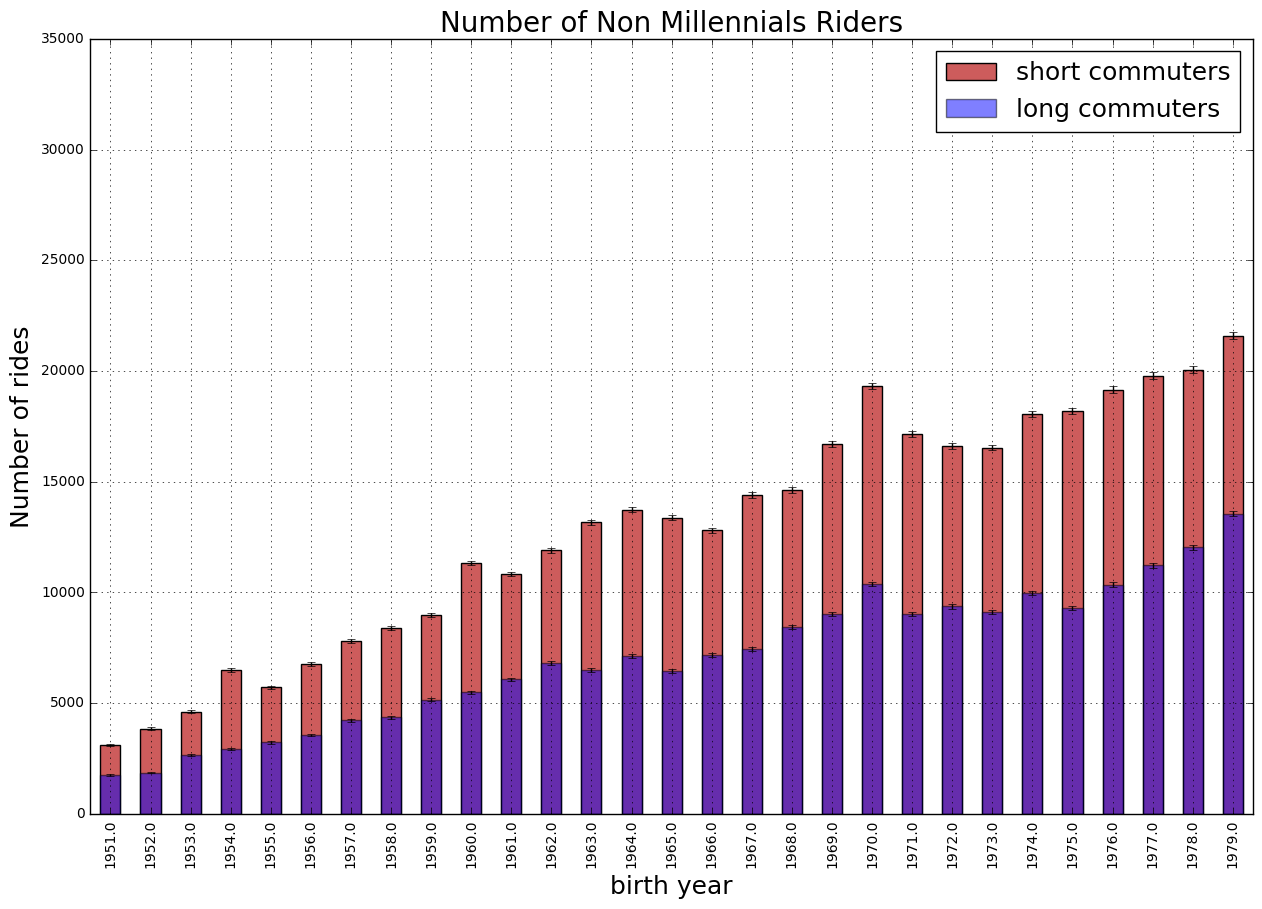

In [11]:
import numpy as np
import matplotlib.pylab as pl
%pylab inline

def plot_vs(m,group):
    
    fig=pl.figure(figsize(15,10)).add_subplot(111)
    counts_s = m["birth year"][m.distance <= avg_dis].groupby(m["birth year"]).count()
    norm_s = 1
    error_s = np.sqrt(counts_s)
    ax=((counts_s) / norm_s).plot(kind="bar",color='IndianRed',  yerr=[
                ((error_s) / norm_s, (error_s) / norm_s)], label='short commuters')


    counts_l = m["birth year"][m.distance > avg_dis].groupby(m["birth year"]).count()
    norm_l = 1
    error_l=np.sqrt(counts_l)
    ((counts_l) / norm_l).plot(kind="bar", alpha=0.5, yerr=[((error_l) / norm_l, (error_l) / norm_l)], label='long commuters')
    ax.set_ylabel ("Number of rides", fontsize = 18)
    ax.set_ylim([0, 35000])
    ax.set_xlabel ("birth year", fontsize = 18)
    pl.legend(['short commuters','long commuters'],fontsize=18)
    pl.title("Number of " + group + " Riders", fontsize = 20)
    pl.grid()
    pl.show()
    return counts_s,counts_l
m_short, m_long = plot_vs(millennials,"Millennials")
o_short, o_long = plot_vs(others,"Non Millennials")

The millennials between 1980 and 1991 have more number of rides per year than non-millennials riders per year, but it drops significantly from the birth year 0f 1993. In the other hand, we can see steady linear progression in non-millennials chart.

### Plot the percentage of long distance trips per birth year

To make it fair and normalized, we divide the number of long distance ridership per birth year with its total per birth year.

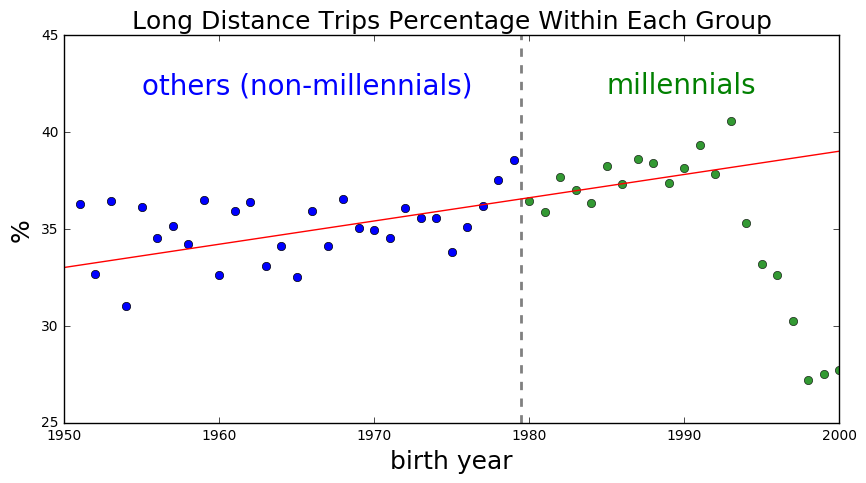

In [12]:
m_percentage = m_long/(m_long+m_short) * 100
o_percentage = o_long/(o_long+o_short) * 100
fig=pl.figure(figsize(10,5))
ax = fig.add_subplot(111)
ax.plot(m_percentage.index,m_percentage.values,'o',color = "green", alpha =0.8)
ax.plot(o_percentage.index,o_percentage.values,'o')
pl.plot([1979.5,1979.5],[25,45],'--',color = 'grey',lw=2)
pl.plot([1950,2000],[33,39],color = 'red')
ax.set_ylabel("%", fontsize=18)
ax.set_xlabel("birth year", fontsize=18)
pl.text(1985,42,r'millennials', color='green', size=20)
pl.text(1955,42,r'others (non-millennials)', color='blue', size=20)
pl.title("Long Distance Trips Percentage Within Each Group", size=18)
pl.show()

### Turns out, we can draw straight line with increasing trend in the scatter plot. The interesting part is, while it seems the percentages of millennilas are higher, they drop significantly in the end. So, we have to conduct a test whether our assumption (millennials tend to take longer rides) is still correct.